In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data Cleaning

In [6]:
# Calculating % null values
round(100*(data.isnull().sum()/len(data)))

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

The dataset does not have any null values


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Univariate Analysis

Let us construct distplot for each of the variables

In [8]:
col = data.columns
col


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Data Set columns

* Age (age in years)
* Sex (1 = male; 0 = female)
* CP (chest pain type)
* TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
* CHOL (serum cholestoral in mg/dl)
* FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* RESTECH (resting electrocardiographic results)
* THALACH (maximum heart rate achieved)
* EXANG (exercise induced angina (1 = yes; 0 = no))
* OLDPEAK (ST depression induced by exercise relative to rest)
* SLOPE (the slope of the peak exercise ST segment)
* CA (number of major vessels (0-3) colored by flourosopy)
* THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
* TARGET (1 or 0)

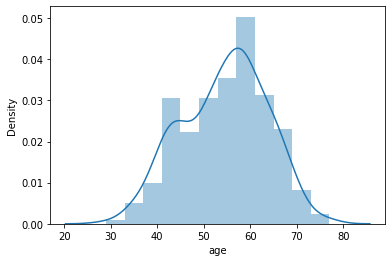

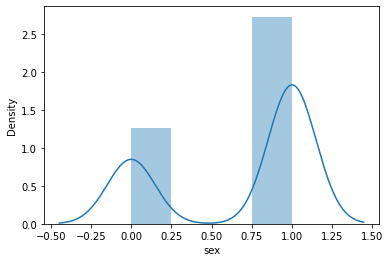

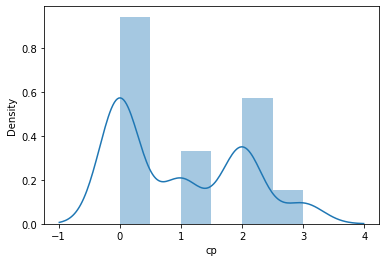

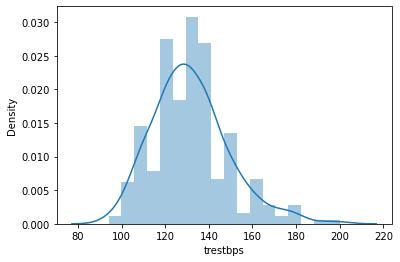

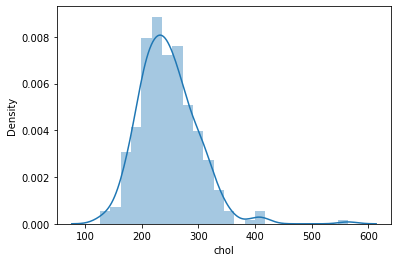

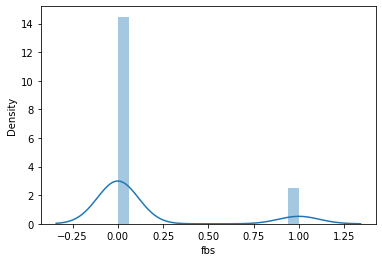

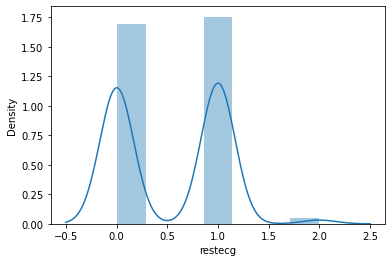

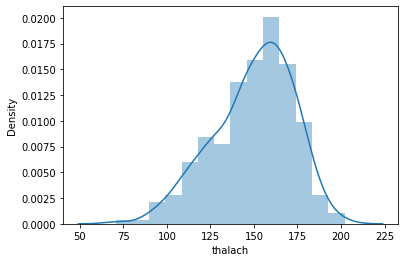

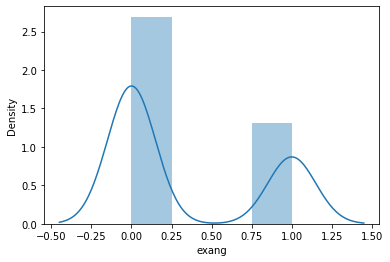

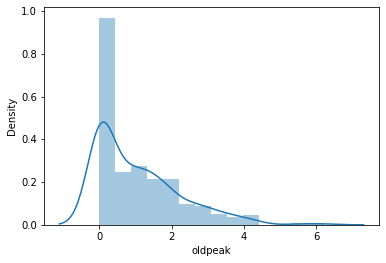

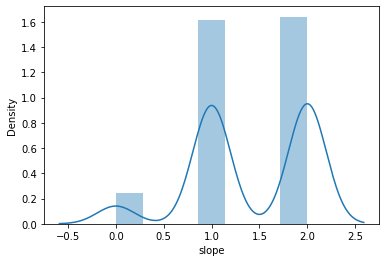

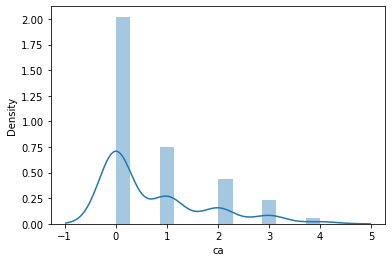

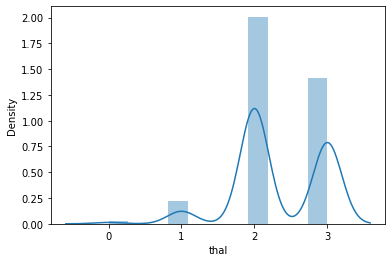

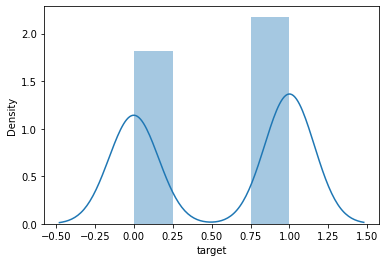

In [9]:
for c in col:
    sns.distplot(data[c])
    plt.show()

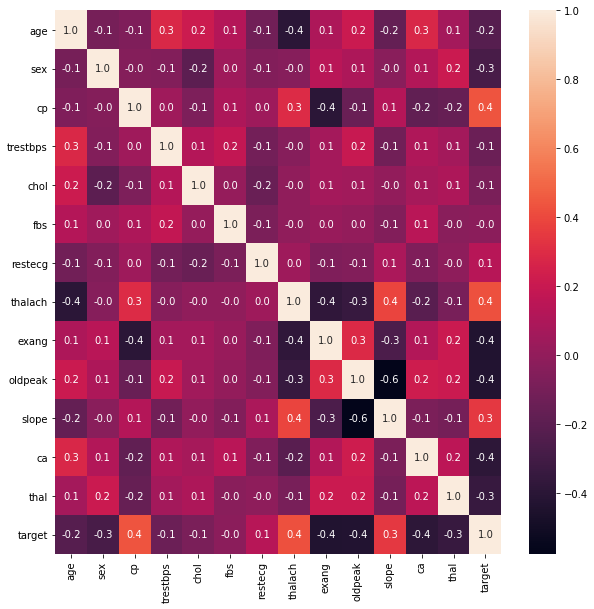

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

* Exercise induced angina is negatively corelated with target variable
* OLDPEAK (ST depression induced by exercise relative to rest) is negatively corelated with target variable

## Train Test Split

In [11]:
dataX=data.drop('target',axis=1)
dataY=data['target']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=42)

## Logistic Regression

### Feature Scaling

In [13]:
scaler = StandardScaler()
X_train[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']] = scaler.fit_transform(X_train[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']])
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,-1.356798,0.722504,0.008099,-0.616856,0.914034,-0.383301,0.843133,0.532781,-0.676632,-0.920864,0.953905,-0.689701,-0.509048
202,0.385086,0.722504,-0.971891,1.169491,0.439527,-0.383301,-1.046109,-1.753582,1.477907,-0.193787,0.953905,-0.689701,1.178480
196,-0.921327,0.722504,0.988089,1.169491,-0.300704,-0.383301,0.843133,-0.139679,-0.676632,2.350982,-0.694988,-0.689701,-0.509048
75,0.058483,-1.384075,0.008099,0.276318,0.059921,-0.383301,-1.046109,0.487950,-0.676632,0.351521,-0.694988,-0.689701,-0.509048
176,0.602822,0.722504,-0.971891,-0.795490,-0.319684,2.608918,0.843133,0.443119,1.477907,0.351521,0.953905,1.333421,1.178480


## Model Building

In [14]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  242
Model:                            GLM   Df Residuals:                      228
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -84.274
Date:                Sun, 16 May 2021   Deviance:                       168.55
Time:                        08:11:07   Pearson chi2:                     223.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1738      0.202      0.860      0.390      -0.222       0.570
age           -0.0806      0.231     -0.349      0.727      -0.533       0.372
sex           -0.8455      0.248     -3.411      0.001      -1.331      -0.360
cp             0.8777      0.217      4.048      0.000       0.453       1.303
trestbps      -0.2964      0.196     -1.509      0.131      -0.681       0.089
chol          -0.1986      0.215     -0.924      0.356      -0.620       0.223
fbs            0.0984      0.213      0.461      0.645      -0.320       0.517
restecg        0.3131      0.210      1.493      0.135      -0.098       0.724
thalach        0.4172      0.271      1.542      0.123      -0.113       0.948
exang         -0.5377      0.214     -2.513      0.012      -0.957      -0.118
oldpeak       -0.7251      0.281     -2.576      0.010      -1.277      -0.173
slope          0.4633      0.240      1.931      0.053      -0.007       0.934
ca            -0.8476      0.225     -3.773      0.000      -1.288      -0.407
thal          -0.5967      0.204     -2.928      0.003      -0.996      -0.197
==============================================================================
"""

In [15]:
col = X_train.columns

In [16]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  242
Model:                            GLM   Df Residuals:                      228
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -84.274
Date:                Sun, 16 May 2021   Deviance:                       168.55
Time:                        08:11:08   Pearson chi2:                     223.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1738      0.202      0.860      0.390      -0.222       0.570
age           -0.0806      0.231     -0.349      0.727      -0.533       0.372
sex           -0.8455      0.248     -3.411      0.001      -1.331      -0.360
cp             0.8777      0.217      4.048      0.000       0.453       1.303
trestbps      -0.2964      0.196     -1.509      0.131      -0.681       0.089
chol          -0.1986      0.215     -0.924      0.356      -0.620       0.223
fbs            0.0984      0.213      0.461      0.645      -0.320       0.517
restecg        0.3131      0.210      1.493      0.135      -0.098       0.724
thalach        0.4172      0.271      1.542      0.123      -0.113       0.948
exang         -0.5377      0.214     -2.513      0.012      -0.957      -0.118
oldpeak       -0.7251      0.281     -2.576      0.010      -1.277      -0.173
slope          0.4633      0.240      1.931      0.053      -0.007       0.934
ca            -0.8476      0.225     -3.773      0.000      -1.288      -0.407
thal          -0.5967      0.204     -2.928      0.003      -0.996      -0.197
==============================================================================
"""

In [17]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

132    0.923516
202    0.039817
196    0.403953
75     0.853973
176    0.058700
59     0.832579
93     0.833716
6      0.805258
177    0.929539
30     0.984725
dtype: float64

In [18]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.92351602, 0.03981688, 0.40395299, 0.85397266, 0.05870043,
       0.83257889, 0.83371634, 0.80525791, 0.92953899, 0.98472548])

In [19]:
y_train_pred_final = pd.DataFrame({'Diseased':y_train.values, 'Diseased_Prob':y_train_pred})
#y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head(12)

,Diseased,Diseased_Prob
0,1,0.923516
1,0,0.039817
2,0,0.403953
3,1,0.853973
4,0,0.058700
5,1,0.832579
6,1,0.833716
7,1,0.805258
8,0,0.929539
9,1,0.984725


##### Creating new column 'Predicted' with 1 if Diseased_Prob > 0.50 else 0

In [20]:
y_train_pred_final['predicted'] = y_train_pred_final.Diseased_Prob.map(lambda x: 1 if x > 0.50 else 0)

# Let's see the head
y_train_pred_final.head()

,Diseased,Diseased_Prob,predicted
0,1,0.923516,1
1,0,0.039817,0
2,0,0.403953,0
3,1,0.853973,1
4,0,0.058700,0


In [21]:
from sklearn import metrics

In [22]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Diseased, y_train_pred_final.predicted )
print(confusion)

[[ 87  22]
 [ 11 122]]


In [23]:
# Predicted     not_diseased  diseased
# Actual
# not_diseased      87(TN)      22(FP)
# disease          11 (FN)         122(TP)  

In [24]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Diseased, y_train_pred_final.predicted))

0.8636363636363636


### Checking VIF


In [25]:
 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,oldpeak,1.75
7,thalach,1.57
10,slope,1.57
0,age,1.49
8,exang,1.42
2,cp,1.27
11,ca,1.22
1,sex,1.21
4,chol,1.19
3,trestbps,1.16


## Metrics beyond simply accuracy


In [26]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [27]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9172932330827067

In [28]:
# Let us calculate specificity
TN / float(TN+FP)

0.7981651376146789

In [29]:
#  predicting non disease when person has disease
print(FN/ float(TN+FN))

0.11224489795918367


In [30]:
# positive predictive value 
print (TP / float(TP+FP))

0.8472222222222222


In [31]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8877551020408163


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [32]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [33]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Diseased, y_train_pred_final.Diseased_Prob, drop_intermediate = False )

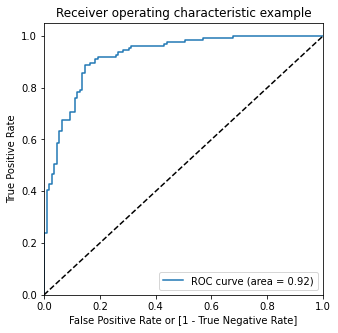

In [34]:
draw_roc(y_train_pred_final.Diseased, y_train_pred_final.Diseased_Prob)

### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [35]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Diseased_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Diseased,Diseased_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.923516,1,1,1,1,1,1,1,1,1,1,1
1,0,0.039817,0,1,0,0,0,0,0,0,0,0,0
2,0,0.403953,0,1,1,1,1,1,0,0,0,0,0
3,1,0.853973,1,1,1,1,1,1,1,1,1,1,0
4,0,0.058700,0,1,0,0,0,0,0,0,0,0,0


In [36]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Diseased, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.549587  1.000000  0.000000
0.1   0.1  0.764463  0.977444  0.504587
0.2   0.2  0.801653  0.962406  0.605505
0.3   0.3  0.830579  0.962406  0.669725
0.4   0.4  0.838843  0.924812  0.733945
0.5   0.5  0.863636  0.917293  0.798165
0.6   0.6  0.859504  0.857143  0.862385
0.7   0.7  0.814050  0.751880  0.889908
0.8   0.8  0.768595  0.624060  0.944954
0.9   0.9  0.690083  0.466165  0.963303


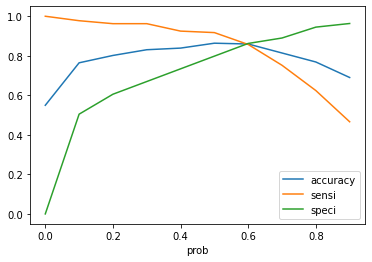

In [37]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [38]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Diseased_Prob.map( lambda x: 1 if x > 0.6 else 0)

y_train_pred_final.head()

,Diseased,Diseased_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.923516,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.039817,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.403953,0,1,1,1,1,1,0,0,0,0,0,0
3,1,0.853973,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.058700,0,1,0,0,0,0,0,0,0,0,0,0


In [39]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Diseased, y_train_pred_final.final_predicted)

0.859504132231405

In [40]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Diseased, y_train_pred_final.final_predicted )
confusion2

array([[ 94,  15],
       [ 19, 114]])

In [41]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [42]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8571428571428571

In [43]:
# Let us calculate specificity
TN / float(TN+FP)

0.8623853211009175